<a href="https://colab.research.google.com/github/mahmud-nobe/Physics_Simulation_Tutorial/blob/main/N_body_simulation/N_body_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.67 * 10**(-11)
AU = 1.49 * 10**11

scale = 3e9
G = 6.67e-11 

class Body:

    def __init__(self, init_position, vel, vel_direction, mass = 1e10, color = 'red', size = 2):
        self.position = init_position
        self.v_mag = vel
        self.v_dir = vel_direction
        self.mass = mass
        self.color = color
        self.size = size

        self.v_x = vel * np.cos(np.deg2rad(vel_direction))
        self.v_y = vel * np.sin(np.deg2rad(vel_direction))

        self.a_x = 0 # acceleration in x direction
        self.a_y = 0 # acceleration in y direction

    def get_distance(self, other_body):
        '''
        Return the magnitude and direction of the distance between
        this body and given other body
        '''
        dx = self.position[0] - other_body.position[0]
        dy = self.position[1] - other_body.position[1]

        dist_mag = np.sqrt(dx**2 + dy**2)
        dist_dir = np.arctan(dy/dx)

        return dist_mag, dist_dir

    def get_acceleration(self, other_body):
        dist_mag, dist_dir = self.get_distance(other_body)

        a_mag = G * other_body.mass / (dist_mag**2)
        a_dir = dist_dir

        a_x = a_mag * np.cos(a_dir)
        a_y = a_mag * np.sin(a_dir)

        return a_x, a_y

class System:
    
    def __init__(self, bodies, time_step = 10**3, scale = 3e9):
        self.bodies = bodies
        self.time_step = time_step
        self.scale = scale
        self.time = 0

    def update_acceleration(self):
        for body in bodies:
            for other_body in bodies:
                if body != other_body:
                    a_x, a_y = body.get_acceleration(other_body)

                    body.a_x += a_x
                    body.a_y += a_y

    def update_position(self):
        for body in bodies:
            x, y = body.position

            x += (body.v_x * self.time_step + 0.5 * body.a_x * self.time_step**2)
            y += (body.v_y * self.time_step + 0.5 * body.a_y * self.time_step**2)

            body.position = (x,y)

    def update_velocity(self):
        for body in bodies:
            body.v_x += (body.a_x * self.time_step) 
            body.v_y += (body.a_x * self.time_step)


    def update(self):
        """
        find the next position using forward Euler's method 
        """
        self.update_acceleration()
        self.update_position()
        self.update_velocity()
        self.time += self.time_step

    def display(self):
        for i in range(len(self.bodies)):
            plt.plot(self.bodies[i].position[0], self.bodies[i].position[1], 
                     marker = 'o', color = self.bodies[i].color, ms = self.bodies[i].size) 
            
            plt.xlim(-3*self.scale, 3*self.scale)
            plt.ylim(-3*self.scale, 3*self.scale)

            plt.xlabel('x direction')
            plt.ylabel('y direction')

        plt.title("System time = "+str(self.time))
        plt.show()


In [ ]:
 np.tan(np.pi/4), np.arctan(1), np.pi/4


(0.9999999999999999, 0.7853981633974483, 0.7853981633974483)

In [12]:
class System:
    
    def __init__(self, bodies, time_step = 10**-3, scale = 3e9):
        self.bodies = bodies
        self.time_step = time_step
        self.scale = scale
        self.time = 0

    def update_acceleration(self):
        for body in bodies:
            for other_body in bodies:
                if body != other_body:
                    a_x, a_y = body.get_acceleration(other_body)

                    body.a_x += a_x
                    body.a_y += a_y

    def update_position(self):
        for body in bodies:
            x, y = body.position

            x += (body.v_x * self.time_step + 0.5 * body.a_x * self.time_step**2)
            y += (body.v_y * self.time_step + 0.5 * body.a_y * self.time_step**2)

            body.position = (x,y)

    def update_velocity(self):
        for body in bodies:
            body.v_x += (body.a_x * self.time_step) 
            body.v_y += (body.a_x * self.time_step)


    def update(self):
        """
        find the next position using forward Euler's method 
        """
        self.update_acceleration()
        self.update_position()
        self.update_velocity()
        self.time += self.time_step

    def display(self):
        for i in range(len(self.bodies)):
            plt.plot(self.bodies[i].position[0], self.bodies[i].position[1], 
                     marker = 'o', color = self.bodies[i].color, ms = self.bodies[i].size) 
            
            plt.xlim(-3*self.scale, 3*self.scale)
            plt.ylim(-3*self.scale, 3*self.scale)

            plt.xlabel('x direction')
            plt.ylabel('y direction')

        plt.title("System time = "+str(self.time))
        plt.show()


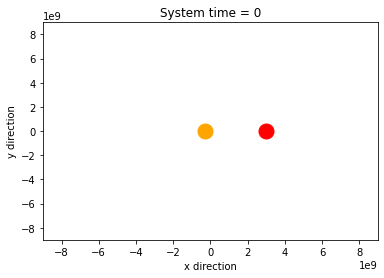

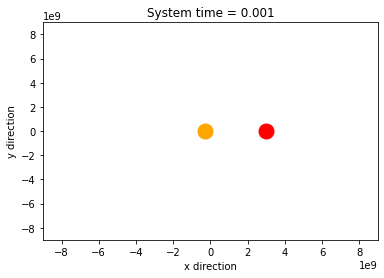

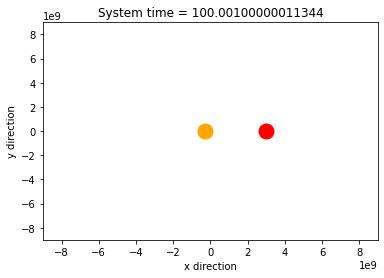

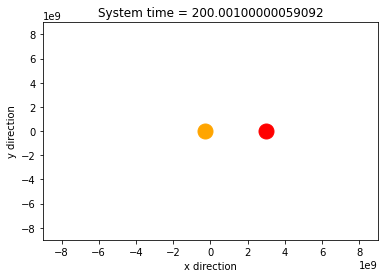

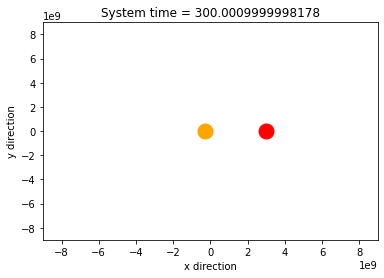

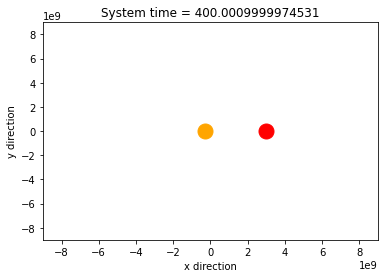

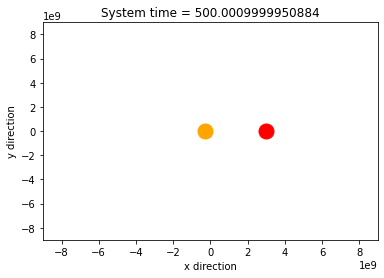

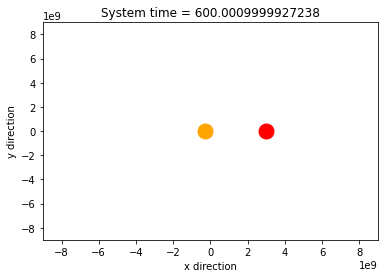

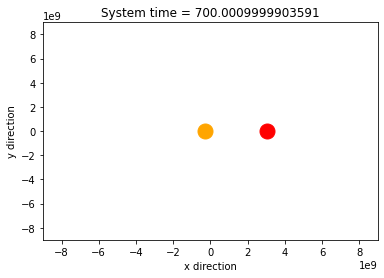

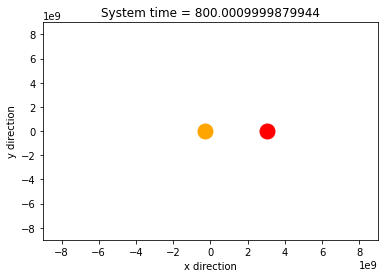

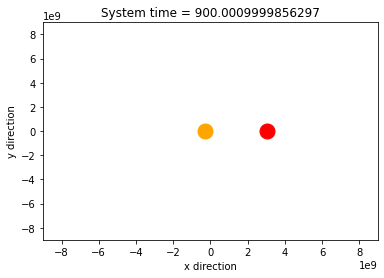

In [7]:

scale = 3e9
m1 =  5.9742*10**24
m2 =  5.9742*10**25
v_rel = np.sqrt(G*(m1+m2)/(1.1*scale))

b1 = Body(init_position = (1*scale,0), mass = m1, vel = v_rel*(m2/(m1+m2)), vel_direction = 90, color = 'r', size = 15)
b2 = Body(init_position = (-0.1*scale,0), mass = m2, vel = v_rel*(m1/(m1+m2)), vel_direction = -90, color = 'orange', size = 15)

bodies = [b1, b2]

t_step = 1e-3
system = System(bodies, time_step=t_step, scale = scale)

system.display()

for i in range(1000000):
    system.update()
    if i%100000 == 0:
        system.display()
        



In [ ]:
for i in range(len(system.bodies)):
    plt.plot(system.bodies[i].position[0], system.bodies[i].position[1], 
             marker = 'o', color = system.bodies[i].color, ms = system.bodies[i].size) 
        
plt.show()

In [ ]:
plt.plot(system.bodies[0].position[0], system.bodies[0].position[1])

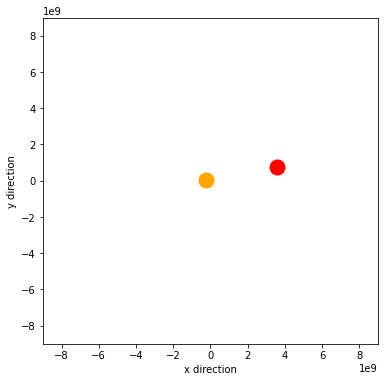

In [ ]:
system.display()


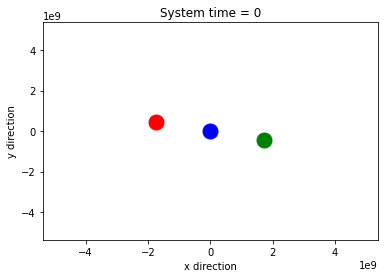

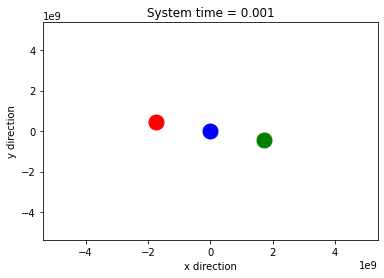

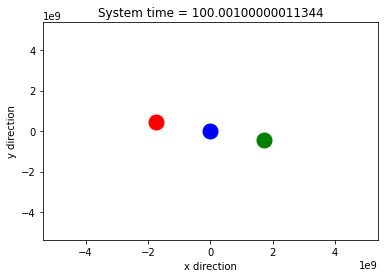

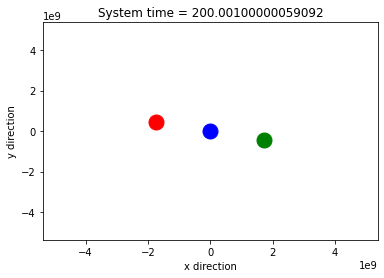

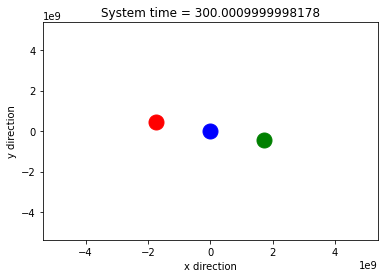

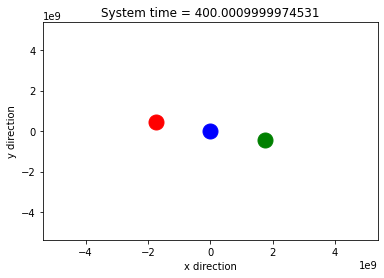

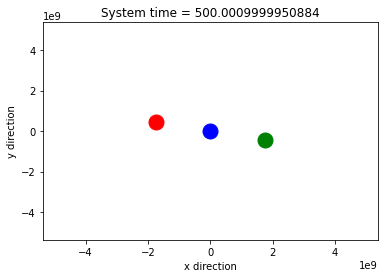

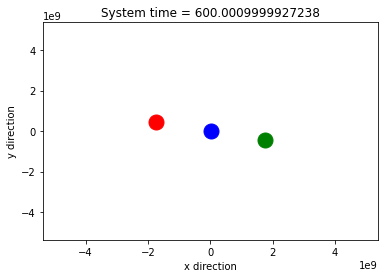

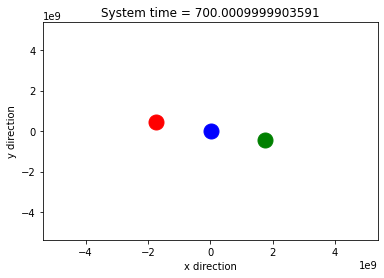

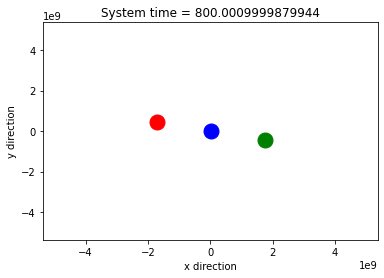

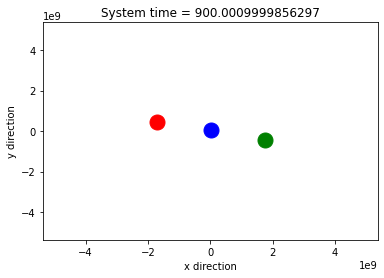

In [9]:
scale = 1.79e9
pos = np.asarray((-0.97000436*scale, 0.24308753*scale))
m1 =  5.9742*10**24
v = 297.83
v_d = 42.843398292913164

b1 = Body(init_position = pos, mass = m1, vel = v, vel_direction = v_d, color = 'r', size = 15)
b2 = Body(init_position = -pos, mass = m1, vel = v, vel_direction = v_d, color = 'g', size = 15)
b3 = Body(init_position = (0,0), mass = m1, vel = 2*v, vel_direction = v_d-180, color = 'b', size = 15)

bodies = [b1, b2, b3]


t_step = 1e-3
system = System(bodies, time_step=t_step, scale = scale)

system.display()

for i in range(1000000):
    system.update()
    if i%100000 == 0:
        system.display()
        

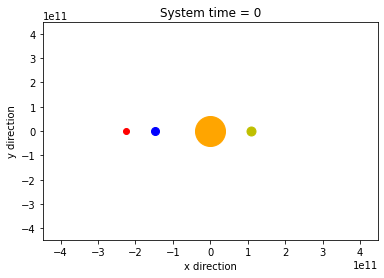

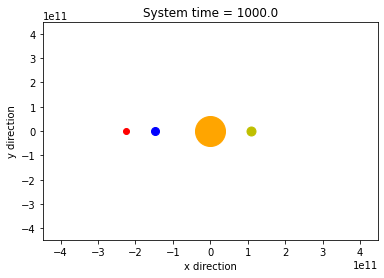

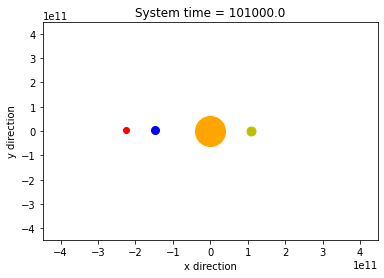

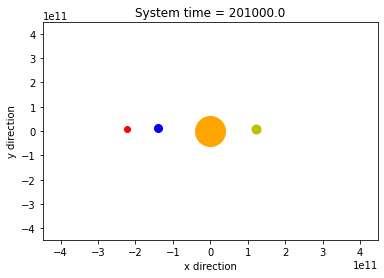

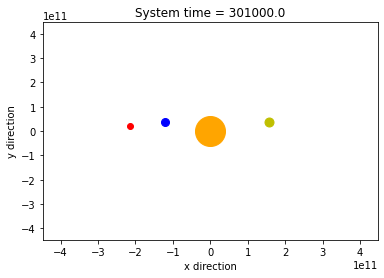

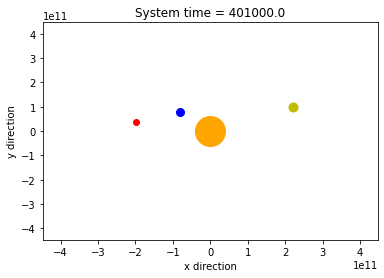

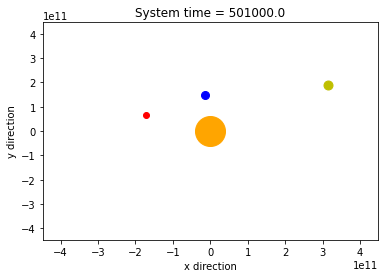

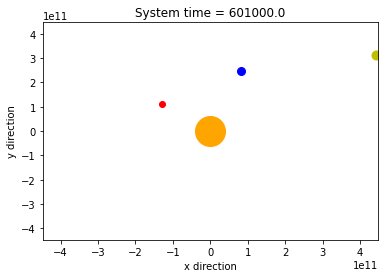

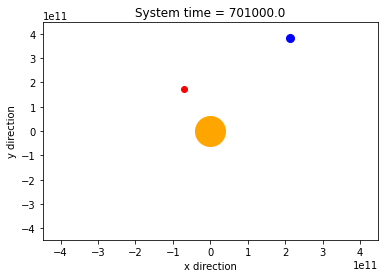

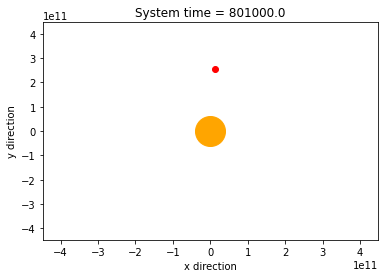

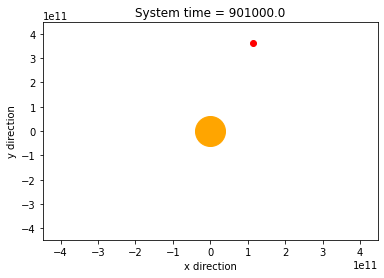

In [16]:
scale = 1.49e11

Sun     = Body(init_position = (0,0), 
               vel = 0, 
               vel_direction = 0)

Earth   = Body(init_position = (-1*scale,0),
                vel = 29.783*1000,
                vel_direction = 90)

Venus   = Body(init_position = (0.723*scale, 0),
                vel = 35.02*1000,
                vel_direction = 270)

Mars    = Body(init_position = (-1.52*scale, 0),
                vel = 24*1000,
                vel_direction = 90)


Sun.mass    = 1.98892e30
Sun.color   = 'orange'
Sun.size    = 30
    
Earth.mass  = 5.9742 * 10 ** 24
Earth.color = 'b'
Earth.size  = 8
    
Venus.mass  = 4.8685 * 10 ** 24
Venus.color = 'y'
Venus.size  = 9
   
Mars.mass   = 6.39 * 10 ** 23
Mars.color  = 'r'
Mars.size   = 6


bodies = [Sun, Earth, Venus, Mars]

t_step = 1e3
system = System(bodies, time_step=t_step, scale = scale)

system.display()

for i in range(1000):
    system.update()
    if i%100 == 0:
        system.display()

Writing to file


MovieWriter stderr:
[gif @ 0x55b894cec600] GIF muxer supports only a single video GIF stream.
Could not write header for output file #0 (incorrect codec parameters ?): Invalid argument
Error initializing output stream 0:0 -- 



CalledProcessError: ignored

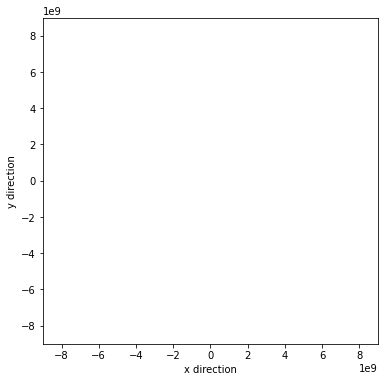

In [ ]:
## Animation code from the study guide

from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
#For displaying animations inside the jupyter notebook
%matplotlib inline 

def animate(i, system, lines):
    #Run 200 update steps between each frame.
		#Can be used to regulate the 'speed' of the animation with affecting accuracy.
    for _ in range(200):
        system.update()
    #Your code shouldn't take much more than ~2 seconds per 50 frames
    if i%50==0:
        clear_output(wait=True)
        print("Progress: ",i)
    
    #Update plot for animation
    for i in range(len(system.bodies)):
        lines[i].set_data(system.bodies[i].position[0], system.bodies[i].position[1])
    return lines
   

#The lower, the more accurate the simulation and the slower the gif is. In seconds.
t_step = 1e3
system = System(bodies, time_step=t_step)


#Create figure
lines = [None] * len(bodies)
fig = plt.figure(figsize = (6,6))
ax = plt.subplot(xlim = (-3*scale, 3*scale), ylim = (-3*scale, 3*scale))

#Create initial frame
for i in range(len(bodies)):
    lines[i], = ax.plot(bodies[i].position[0], bodies[i].position[1], 
          marker = 'o', color = bodies[i].color, ms = bodies[i].size) 

#Length of animation in frames
frame_count = np.arange(1, 200)
#Create animation
ani = animation.FuncAnimation(fig, animate, frame_count,
                              interval = 1000/30, blit = True, fargs = [system, lines])
ax.set_xlabel('x direction')
ax.set_ylabel('y direction')

#Comment away the animation line to run the simulation indefinitely in the editor
print("Writing to file")
ani.save("OrbitSimulation.gif")
print("Done")

plt.show()